<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/RL/6-1-Cart-Pole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gymnasium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 6.6 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:


# Create the CartPole environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Reset the environment with a custom seed and custom initial position range
obs, info = env.reset(seed=123, options={"low": -0.1, "high": 0.1})

# Extract the initial observation (state)
state = obs
print(f"Initial state: {state}")

# Run the environment for a few steps to see how it evolves
n_steps = 100  # Number of steps to simulate
frames = []  # To store frames for rendering

for step in range(n_steps):
    frames.append(env.render())  # Capture the frame of the environment

    action = env.action_space.sample()  # Randomly select an action (left or right)
    state, reward, done, truncated, info = env.step(action)  # Take a step

    # Print the state, action, and reward for each step
    print(f"Step: {step}, Action: {action}, State: {state}, Reward: {reward}")

    if done:
        print("Pole fell! Resetting environment.")
        obs, info = env.reset(seed=123, options={"low": -0.1, "high": 0.1})
        state = obs

# Render the environment frames to visualize the CartPole problem
env.close()

Initial state: [ 0.03647037 -0.0892358  -0.05592803 -0.06312564]
Step: 0, Action: 0, State: [ 0.03468566 -0.28351313 -0.05719054  0.21140045], Reward: 1.0
Step: 1, Action: 1, State: [ 0.02901539 -0.08762209 -0.05296253 -0.09876057], Reward: 1.0
Step: 2, Action: 1, State: [ 0.02726295  0.10821734 -0.05493774 -0.4076715 ], Reward: 1.0
Step: 3, Action: 1, State: [ 0.0294273   0.30407348 -0.06309117 -0.71715605], Reward: 1.0
Step: 4, Action: 1, State: [ 0.03550877  0.50000924 -0.07743429 -1.0290115 ], Reward: 1.0
Step: 5, Action: 1, State: [ 0.04550895  0.6960715  -0.09801452 -1.3449665 ], Reward: 1.0
Step: 6, Action: 0, State: [ 0.05943038  0.5023093  -0.12491385 -1.0844884 ], Reward: 1.0
Step: 7, Action: 1, State: [ 0.06947657  0.69883794 -0.14660361 -1.4136137 ], Reward: 1.0
Step: 8, Action: 1, State: [ 0.08345333  0.89544064 -0.17487589 -1.7483015 ], Reward: 1.0
Step: 9, Action: 0, State: [ 0.10136214  0.702684   -0.20984192 -1.5147282 ], Reward: 1.0
Pole fell! Resetting environment.
S

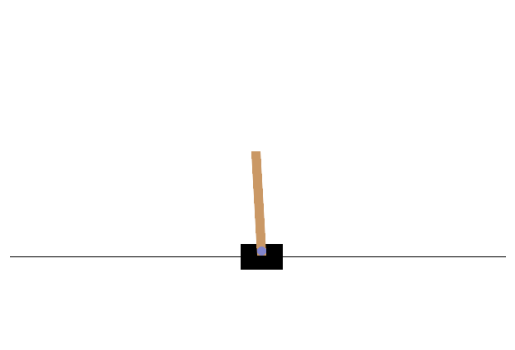

In [4]:


# Visualize a sample frame
plt.imshow(frames[0])
plt.axis('off')
plt.show()


Explanation:
Environment Creation: The code initializes the CartPole-v1 environment.
Reset with Custom Options: The environment is reset with a custom seed and initial position bounds for the state.
Simulation Loop: The environment is run for 100 steps, with actions randomly chosen using env.action_space.sample().
Frame Capture: Each frame is captured for rendering purposes.
Rendering and Plotting: At the end, a sample frame is displayed using matplotlib.
This code allows you to visualize the behavior of the CartPole over time.

In [5]:
import gymnasium as gym
import numpy as np
import imageio
import os


In [6]:

# Create the CartPole environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Reset the environment with a custom seed and custom initial position range
obs, info = env.reset(seed=123, options={"low": -0.1, "high": 0.1})

# Extract the initial observation (state)
state = obs
print(f"Initial state: {state}")

# Run the environment for a few steps to see how it evolves
n_steps = 100  # Number of steps to simulate
frames = []  # To store frames for rendering

# Directory to save the video
video_dir = "cartpole_video"
if not os.path.exists(video_dir):
    os.makedirs(video_dir)

# Loop to simulate the environment and collect frames
for step in range(n_steps):
    frames.append(env.render())  # Capture the frame of the environment

    action = env.action_space.sample()  # Randomly select an action (left or right)
    state, reward, done, truncated, info = env.step(action)  # Take a step

    # Print the state, action, and reward for each step
    print(f"Step: {step}, Action: {action}, State: {state}, Reward: {reward}")

    if done:
        print("Pole fell! Resetting environment.")
        obs, info = env.reset(seed=123, options={"low": -0.1, "high": 0.1})
        state = obs

# Save frames as a video using imageio
video_file_path = os.path.join(video_dir, "cartpole_simulation.mp4")
imageio.mimsave(video_file_path, frames, fps=30)

# Close the environment
env.close()

Initial state: [ 0.03647037 -0.0892358  -0.05592803 -0.06312564]
Step: 0, Action: 1, State: [ 0.03468566  0.10664157 -0.05719054 -0.37291655], Reward: 1.0
Step: 1, Action: 1, State: [ 0.03681849  0.30252734 -0.06464887 -0.6830697 ], Reward: 1.0
Step: 2, Action: 1, State: [ 0.04286904  0.4984846  -0.07831027 -0.9953851 ], Reward: 1.0
Step: 3, Action: 1, State: [ 0.05283873  0.69456166 -0.09821796 -1.311599  ], Reward: 1.0
Step: 4, Action: 1, State: [ 0.06672996  0.8907805  -0.12444995 -1.6333385 ], Reward: 1.0
Step: 5, Action: 1, State: [ 0.08454557  1.0871245  -0.15711671 -1.9620705 ], Reward: 1.0
Step: 6, Action: 1, State: [ 0.10628806  1.2835233  -0.19635813 -2.2990425 ], Reward: 1.0
Step: 7, Action: 1, State: [ 0.13195853  1.4798366  -0.24233897 -2.645213  ], Reward: 1.0
Pole fell! Resetting environment.
Step: 8, Action: 0, State: [ 0.03468566 -0.28351313 -0.05719054  0.21140045], Reward: 1.0
Step: 9, Action: 0, State: [ 0.02901539 -0.4777727  -0.05296253  0.4855086 ], Reward: 1.0
S

In [7]:


print(f"Video saved to {video_file_path}")


Video saved to cartpole_video/cartpole_simulation.mp4
